# Gasoline prices during presidential terms
## Objective

This notebook looks at gas prices for presential terms from 1994

## Data Loading and Preprocessing
- **Data Sources**: We utilized one CSV file containing data on Regular gasoline prices.
- **Preprocessing Steps**:
  - loading data from csv files and removing any unnecessary and unused columns.
  - Assign meaningful column names based on the data structure.
  - Convert the 'Date' column to datetime format for better manipulation.
  - Resample the data set to only take one montly input.
  - Make a dictionary of the presidents and their terms.

## Analysis Overview
- **Visualization**:
  - Created a graph that showed gas prices through each presidential term through the years
  - Created a graph that showed gas prices at the same stage through each presidents term.

## Results
- **Comparison of Each President**:
  - There is a significant drop at the end of bush's presidency
  - There is a big spike in Biden's presidency.
  - The gas prices during obamas presidency started and ended the same from the start of his first term and the end of the second term



## Conclusion
- Gas price drops at the end of the bush's presidency becuase of an economic fall.
- Gas price peaks during Biden's presidency because of a global inflation due to covid.
- Gas price will sometimes take a fall right before the presidential term to hopefully earn over some voters.
- Gas price falls at end of obama's second term due to increase oil production in the United States.

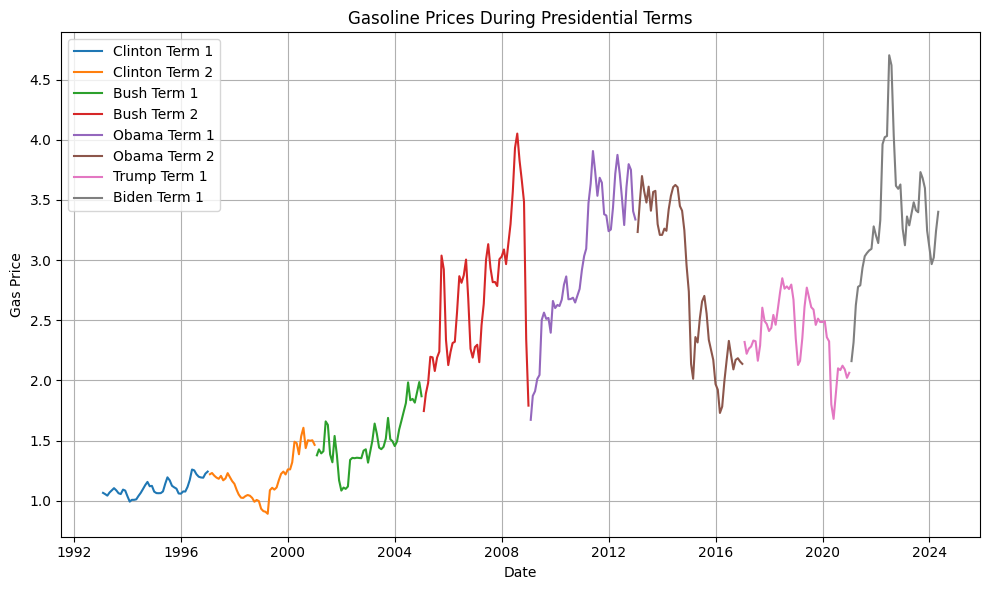

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data/Data1_Regular_Conventional.csv", header=2)
df = df.iloc[:-1, :2]
new_headers = ['Date', 'Gas Price']  # Specify your new column names here
df['Date'] = pd.to_datetime(df['Date'])
df.columns = new_headers
df

df = df.set_index('Date').resample('M').first().reset_index()


presidential_terms = {
    'Clinton': [(1993, 1996), (1997, 2000)],
    'Bush': [(2001, 2004), (2005, 2008)],
    'Obama': [(2009, 2012), (2013, 2016)],
    'Trump': [(2017, 2020)],
    'Biden': [(2021, 2024)] 
}

# Plot gas prices for each presidential term
plt.figure(figsize=(10, 6))
for president, terms in presidential_terms.items():
    for term_num, (start_year, end_year) in enumerate(terms, start=1):
        subset = df[(df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= end_year)]
        plt.plot(subset['Date'], subset['Gas Price'], label=f"{president} Term {term_num}")

plt.title('Gasoline Prices During Presidential Terms')
plt.xlabel('Date')
plt.ylabel('Gas Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




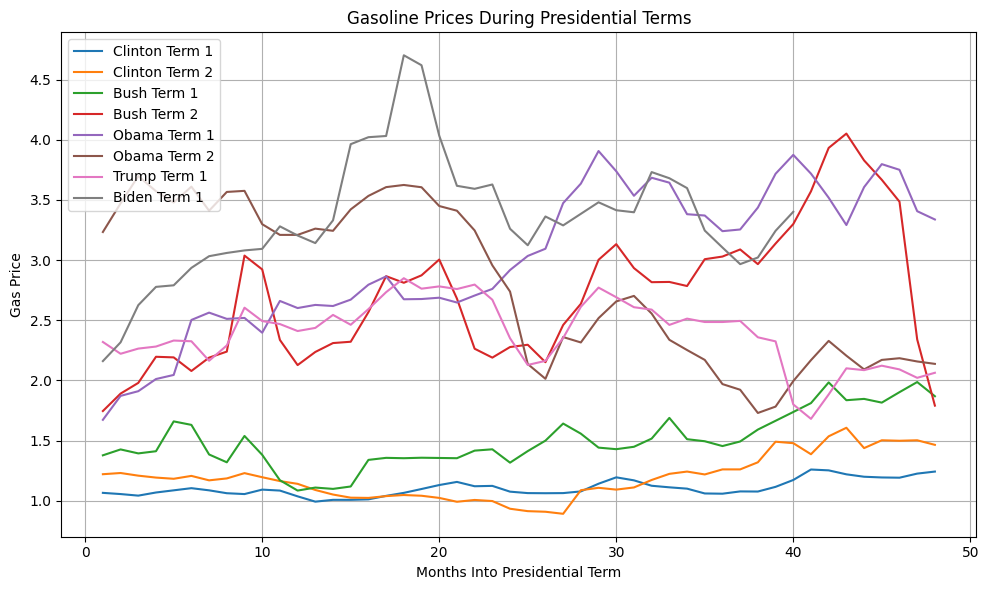

In [2]:
# Plot gas prices for each presidential term
plt.figure(figsize=(10, 6))
for president, terms in presidential_terms.items():
    for term_num, (start_year, end_year) in enumerate(terms, start=1):
        subset = df[(df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= end_year)]
        months_into_term = (subset['Date'].dt.year - start_year) * 12 + subset['Date'].dt.month
        plt.plot(months_into_term, subset['Gas Price'], label=f"{president} Term {term_num}")

plt.title('Gasoline Prices During Presidential Terms')
plt.xlabel('Months Into Presidential Term')
plt.ylabel('Gas Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()